# **Overview**

Trong thị giác máy tính, không gian màu được chọn có thể có hiệu suất đáng kể của mô hình. Trong khi `RGB` là không gian màu phổ biến nhất, trong nhiều tình huống, mô hình hoạt động tốt hơn khi chuyển sang các không gian màu thay thế, chẳng hạn như `YUV, YCbCr, XYZ (CIE), etc.`

Gói `tensorflow-io` cung cấp danh sách các API chuyển đổi không gian màu có thể được sử dụng để chuẩn bị và tăng cường dữ liệu hình ảnh.

# **Setup**

## Install required Packages, and restart runtime

In [ ]:
!pip install tensorflow-io

     |████████████████████████████████| 24.1MB 1.4MB/s 
     |████████████████████████████████| 2.5MB 34.4MB/s 


## Download the sample image

Ví dụ hình ảnh được sử dụng trong sổ tay này là một con mèo trong tuyết, mặc dù nó có thể được thay thế bằng bất kỳ hình ảnh JPEG nào.

Phần sau sẽ tải xuống hình ảnh và lưu vào đĩa cục bộ dưới dạng sample.jpg:

In [ ]:
!curl -o sample.jpg -L https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg

!ls -ls sample.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17858  100 17858    0     0   174k      0 --:--:-- --:--:-- --:--:--  174k
20 -rw-r--r-- 1 root root 17858 Jun  3 14:48 sample.jpg


# Usage

## Read Image File

Đọc và giải mã hình ảnh thành `uint8 Tensor` của hình dạng `(213, 320, 3)`

In [ ]:
  import tensorflow as tf
  import tensorflow_io as tfio

  image = tf.image.decode_jpeg(tf.io.read_file('sample.jpg'))

  print(image.shape, image.dtype)

(213, 320, 3) <dtype: 'uint8'>


HIển thị ảnh

<function matplotlib.pyplot.show>

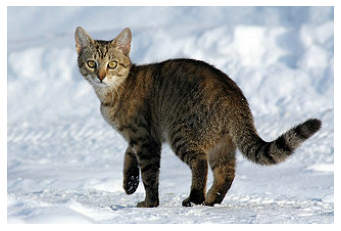

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show

In [ ]:
image.shape

TensorShape([213, 320, 3])

## Convert RGB to Grayscale

Hình ảnh `RGB` có thể được chuyển đổi thành `Grayscale`  giảm kênh từ 3 xuống 1 với `tfio.experimental.color.rgb_to_grayscale`:

(213, 320, 1) <dtype: 'uint8'>


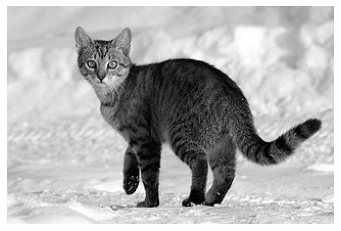

In [ ]:
grayscale = tfio.experimental.color.rgb_to_grayscale(image)

print(grayscale.shape, grayscale.dtype)

# use tf.squeeze to remove last channel for plt.imshow to display
plt.figure()
plt.imshow(tf.squeeze(grayscale, axis = -1), cmap = 'gray')
plt.axis('off')
plt.show() 

## Convert RGB to BGR

`tfio.experimental.color.rgb_to_bgr`

(213, 320, 3) <dtype: 'uint8'>


(-0.5, 319.5, 212.5, -0.5)

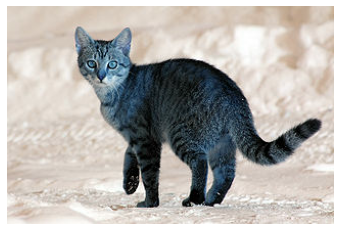

In [ ]:
img_bgr = tfio.experimental.color.rgb_to_bgr(image)

print(img_bgr.shape, img_bgr.dtype)

plt.figure()
plt.imshow(img_bgr) 
plt.axis('off')

## Convert RGB to CIE XYZ

`CIE XYZ` (hay `CIE 1931 XYZ`) là không gian màu phổ biến được sử dụng trong nhiều chương trình xử lý ảnh.chuyển đổi từ `RGB` sang `CIE XYZ` thông qua `tfio.experimental.color.rgb_to_xyz`

> Lưu ý: `tfio.experimental.color.rgb_to_xyz` giả định đầu vào dấu phẩy động trong phạm vi `[0, 1]` vì vậy cần xử lý trước bổ sung:

(213, 320, 3) <dtype: 'uint8'>


(-0.5, 319.5, 212.5, -0.5)

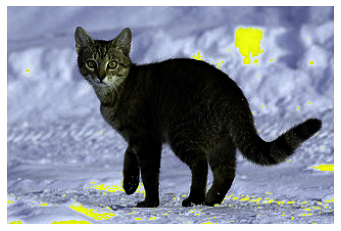

In [ ]:
# Convert dtype of image to float32

img_float32 =  tf.cast(image, tf.float32)/ 255.0

xyz_float32 = tfio.experimental.color.rgb_to_xyz(img_float32)

# Convert back uint8

img_xyz = tf.cast(xyz_float32*255.0, tf.uint8)

print(img_xyz.shape, img_xyz.dtype)

plt.figure()
plt.imshow(img_xyz)
plt.axis('off')

## Convert RGB to YCbCr

`YCbCr` là không gian màu mặc định trong nhiều hệ thống video.Việc chuyển đổi sang YCbCr có thể được thực hiện thông qua `tfio.experimental.color.rgb_to_ycbcr:`

tf.Tensor(
[[[191 135 121]
  [191 135 121]
  [191 135 121]
  ...
  [175 138 117]
  [170 140 116]
  [167 141 116]]

 [[191 135 121]
  [191 135 121]
  [191 135 121]
  ...
  [176 138 117]
  [170 140 116]
  [165 142 115]]

 [[192 135 121]
  [192 135 121]
  [192 135 121]
  ...
  [176 138 117]
  [169 141 116]
  [165 142 115]]

 ...

 [[218 130 125]
  [220 130 125]
  [222 130 125]
  ...
  [203 133 123]
  [205 132 123]
  [195 131 123]]

 [[220 130 125]
  [221 130 125]
  [223 130 125]
  ...
  [208 133 123]
  [211 131 123]
  [203 131 123]]

 [[221 130 125]
  [222 130 125]
  [224 130 125]
  ...
  [211 132 123]
  [218 131 123]
  [213 130 123]]], shape=(213, 320, 3), dtype=uint8) <dtype: 'uint8'>


(-0.5, 319.5, 212.5, -0.5)

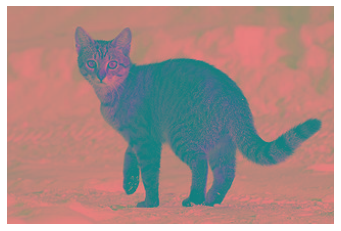

In [ ]:
img_ycbcr = tfio.experimental.color.rgb_to_ycbcr(image)

print(img_ycbcr, img_ycbcr.dtype)

plt.figure()
plt.imshow(img_ycbcr)
plt.axis('off')

`YCbCr` có thể được phân hủy thành các thành phần `Y '(luma)`, `Cb (sắc độ khác biệt màu xanh lam)` và `Cr (sắc độ khác biệt màu đỏ)` với mỗi thành phần mang thông tin có ý nghĩa về mặt tri giác:

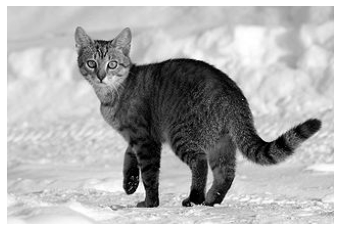

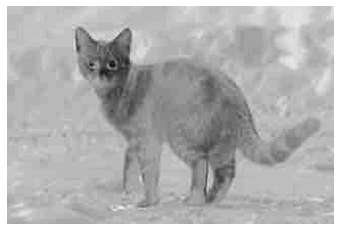

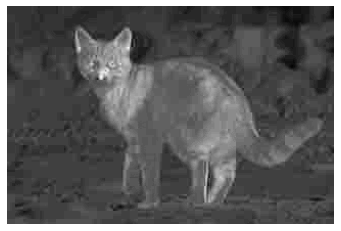

In [ ]:
y, cb, cr = img_ycbcr[:,:,0], img_ycbcr[:,:,1], img_ycbcr[:,:,2]

# Y' component
plt.figure()
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Cb component
plt.figure()
plt.imshow(cb, cmap='gray')
plt.axis('off')
plt.show()

# Cr component
plt.figure()
plt.imshow(cr, cmap='gray')
plt.axis('off')
plt.show()